# Algebra linear com aplicações Howard Anton & Chris Rorres:

# Exercicios do capitulo 10.10

# Funções utilizadas ao longo dos exercicios

## Coordenadas em 3D

In [1]:
def coordenadas(ax_size = (-2,2), plane = False, opacity = 0.7):
    u, v = var('y, z')
    size = (ax_size[1] - ax_size[0])
    u_ = (u, ax_size[0], ax_size[1]) # dimensão dos eixos / planos
    v_ = (v, ax_size[0], ax_size[1]) # dimensão dos eixos / planos

    x = parametric_plot((u, 0, 0), u_,  opacity=1, color='red')
    x += vector([ax_size[1],0,0]).plot(color = 'red')
    labels = text3d('x',1.1*vector([ax_size[1],0,0]),fontsize= str(50*size)+'%')
    
    y = parametric_plot((0, u, 0), u_,  opacity=1, color='yellow')
    y += vector([0,ax_size[1],0]).plot(color = 'yellow')
    labels += text3d('y',1.1*vector([0,ax_size[1],0]),fontsize= str(50*size)+'%')
    
    z = parametric_plot((0, 0, u), u_,  opacity=1) # Blue
    z += vector([0,0,ax_size[1]]).plot(color = 'blue')
    labels += text3d('z',1.1*vector([0,0,ax_size[1]]),fontsize= str(50*size)+'%')
    
    if plane == True:
        
        cont = ax_size[0]
        xy = parametric_plot((u, cont, 0), u_, opacity=opacity, color='black')
        xy += parametric_plot((cont, u, 0), u_, opacity=opacity, color='black')
        while cont != ax_size[1]:

            cont += size/10
            xy += parametric_plot((u, cont, 0), u_, opacity=opacity, color='black')
            xy += parametric_plot((cont, u, 0), u_, opacity=opacity, color='black')
        return xy + x + y + z + labels # planos

    return x + y + z + labels #eixos
    

## Translação atravês de produto de matrizes

In [2]:
def translacao(figura, translacao): 
    for i in figura:
        i.append(1)

    mat_translacao = matrix([[1,0,0],[0,1,0],[0,0,1],[translacao[0],translacao[1],translacao[2]]])
    figura_transladada = matrix(figura) * mat_translacao

    return figura_transladada

print(translacao([[1,0,0],[0,1,0],[0,0,0],[0,0,0]], [1,2,0]))

[2 2 0]
[1 3 0]
[1 2 0]
[1 2 0]


## projeção de um objeto no plano xy

In [3]:
def projxy(objeto):
    obj2d = []
    for i in objeto:
        obj2d.append(i[0:2])
    return obj2d
print(projxy([[0,1,1,0], [0,1,2,0], [0,2,2,0], [0,2,1,0], [0,1,1,0]]))

[[0, 1], [0, 1], [0, 2], [0, 2], [0, 1]]


## rotação eixo x

In [4]:
def mat_rotx(alfa):
    mat_rotx = matrix([[1, 0, 0],[0, cos(alfa), -sin(alfa)],[0, sin(alfa), cos(alfa)]])
    return mat_rotx
    

## rotação eixo y

In [5]:
def mat_roty(beta):
    mat_roty = matrix([[cos(beta), 0, sin(beta)] , [0, 1 ,0],[-sin(beta) ,0 ,cos(beta)]])
    return mat_roty
    

## rotação eixo z

In [6]:
def mat_rotz(gamma):
    mat_rotz = matrix([[cos(gamma), -sin(gamma), 0], [sin(gamma), cos(gamma), 0], [0, 0, 1]])
    return mat_rotz
    

## Rotação em torno de um eixo arbitrario (Questão T2)

In [1]:
def mat_rot2(θ, vector): # O vetor deve ser unitario, caso contrario apresentara erros
    R = cos(θ) * matrix([[1,0,0],[0,1,0],[0,0,1]]) + (1 - cos(θ)) * vector.tensor_product(vector) + sin(θ) * matrix([[0,-vector[2],vector[1]],[vector[2],0,-vector[0]],[-vector[1],vector[0],0]])
    return R

## Rotação em torno de um eixo arbitrario

In [8]:
def mat_rot1(α, β, θ):
    
    R1 = mat_roty(β)
    R2 = mat_rotz( α)
    R3 = mat_roty(θ)
    R4 = mat_rotz(- α)
    R5 = mat_roty(- β)
    mat_rot = R5 * R4 * R3 * R2 * R1
    
    return mat_rot
mat_rot1(pi,0,0)

[1 0 0]
[0 1 0]
[0 0 1]

## Mudança de escala

In [9]:
def mat_esc(k1,k2,k3):
    mat_escala = matrix([[k1,0,0],[0,k2,0],[0,0,k3]])
    return mat_escala

# Questão 1

## a) Qual é a matriz de coordenadas da Imagem 9?

In [10]:
quad = [[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]]
p = [
  [1.000, -0.800, 0.000],
  [0.500, -0.800, 0.866],
  [-0.500, -0.800, -0.866],
  [-1.000, -0.800, 0.000],
  [-0.500, -0.800, 0.866],
  [0.500, -0.800, 0.866],
  [0.840, -0.400, 0.000],
  [0.315, 0.125, -0.546],
  [-0.210, 0.650, -0.364],
  [-0.360, 0.800, 0.000],
  [-0.210, 0.650, 0.364],
  [0.315, 0.125, 0.546]
]

mat_quad = matrix(quad)
mat_p = matrix(p)


## b) Qual é a matriz de coordenadas da Imagem 9 depois de uma mudança de escala por um fator $1/2$ de na direção x e $1/2$ na direção y? Faça um esboço da imagem transformada.

In [11]:
mat_escala = matrix([[1/2,0,0],[0,1/2,0],[0,0,1]])
mat_res = mat_quad  * mat_escala
mat_res

[  0   0   0]
[1/2   0   0]
[1/2 1/2   0]
[  0 1/2   0]

In [12]:
Polyhedron(mat_res).plot() + coordenadas(plane = True)

Graphics3d Object

## c) Qual é a matriz de coordenadas da Imagem 9 depois de transladada pelo vetor.

In [13]:
mat_res = mat_quad + matrix([[1/2,0,0]]*4)
mat_res

[1/2   0   0]
[3/2   0   0]
[3/2   1   0]
[1/2   1   0]

### Faça um esboço da imagem transformada.

In [14]:
obj = Polyhedron(mat_res).plot()

show(obj + coordenadas(ax_size = (-2,2), plane = True, opacity = 1))

Graphics3d Object

## Qual é a matriz de coordenadas da Imagem 9 depois de girada por um ângulo de 30° em torno do eixo z? Faça um esboço da imagem transformada.

## d)

In [15]:
obj = Polyhedron(matrix(quad) * mat_rotz(-pi.n()/6)).plot()
show(obj + coordenadas(ax_size = (-2,2), plane = False, opacity = 1))

Graphics3d Object

In [16]:
exemplo1 = mat_quad * mat_rotz(pi.n() / 6)
exemplo1

[ 0.000000000000000  0.000000000000000  0.000000000000000]
[ 0.866025403784439 -0.500000000000000  0.000000000000000]
[  1.36602540378444  0.366025403784439  0.000000000000000]
[ 0.500000000000000  0.866025403784439  0.000000000000000]

In [17]:
Polyhedron(exemplo1).plot() + coordenadas(plane = True)

Graphics3d Object

# Questão 2

## a) Se a matriz de coordenadas da Imagem 9 for multiplicada pela matriz

In [18]:
mat_cesi = matrix([[1,1/2,0],[0,1,0],[0,0,1]])
Polyhedron(mat_quad * mat_cesi).plot() + coordenadas(plane = True)

Graphics3d Object

## b) Quais são as coordenadas dos quatro vértices do quadrado cisalhado da Imagem 10?

In [19]:
mat_res = mat_quad * mat_cesi
mat_res

[  0   0   0]
[  1 1/2   0]
[  1 3/2   0]
[  0   1   0]

## c) determina um cisalhamento na direção y de fator 0,6 em relação à coordenada x (um exemplo aparece na Imagem 11).

In [20]:
mat_cesi_2 = matrix([[1,0,0],[0.6,1,0],[0,0,1]])
mat_res = mat_quad * mat_cesi
mat_res

[  0   0   0]
[  1 1/2   0]
[  1 3/2   0]
[  0   1   0]

## Esboce uma imagem do quadrado da Imagem 9 depois de uma tal transformação de cisalhamento e encontre as novas coordenadas de seus quatro vértices.

In [21]:
Polyhedron(mat_quad * mat_cesi_2).plot() + coordenadas(plane = True)

Graphics3d Object

# Questão 3

## a) A reflexão no plano xz é definida como a transformação que associa a cada ponto (xi , yi , zi) o ponto (xi , -yi , zi) (por exemplo, ver Imagem 12). Se P e P' forem as matrizes de coordenadas de uma imagem e de sua reflexão no plano xz, respectivamente, encontre uma matriz M tal que $P' = MP$.

In [22]:
espelhamento_xz = [[1,0,0],[0,-1,0],[0,0,1]]
espelhamento_xz

[[1, 0, 0], [0, -1, 0], [0, 0, 1]]

## b) Analogamente à parte (a), defina a reflexão no plano yz e construa a matriz correspondente a essa transformação. Faça um esboço da Imagem 1 refletida no plano yz.

In [23]:
espelhamento_yz = [[-1,0,0],[0,1,0],[0,0,1]]
espelhamento_yz

[[-1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [24]:
obj = Polyhedron(mat_quad * matrix(espelhamento_yz)).plot()
coordenadas(ax_size = (-2,2), plane = True, opacity = 0.5).plot() + obj

Graphics3d Object

## c)  Analogamente à parte (a), defina a reflexão no plano xy e construa a matriz correspondente a essa transformação. Faça um esboço da Imagem 1 refletida no plano xy.

In [25]:
espelhamento_xy = [[1,0,0],[0,1,0],[0,0,-1]]
espelhamento_xy

[[1, 0, 0], [0, 1, 0], [0, 0, -1]]

In [26]:
obj = Polyhedron(mat_quad * matrix(espelhamento_xy)).plot()
coordenadas(ax_size = (-2,2), plane = True, opacity = 0.5).plot() + obj

Graphics3d Object

# Questão 4

## a) Imagem 13 é o resultado da Imagem 1 submetida às cinco transformações seguintes.
## 1. Mudança de escala de fator $1/2$ na direção x, 2 na direção y e $1/2$ na direção z.
## 2. Translação de $1/2$ unidade na direção x
## 3. Rotação de 20° em torno do eixo x.
## 4. Rotação de -45° em torno do eixo y
## 5. Rotação de 90° em torno do eixo z.

In [27]:
M1 = mat_esc(1/2,2,1/3)
# Devemos modificar M2 para que a soma matricial seja compativel com cada objeto
M3 = mat_rotx(pi.n()/9)
M4 = mat_roty(-pi.n() / 4) 
M5 = mat_rotz(pi.n() / 2)

In [28]:
M2 = matrix([[1/2,0,0]]*4) # Devemos modificar M2 para que a soma matricial seja compayivel com o objeto mat_quad

mat_tran_quad4 = ((mat_quad * M1 + M2 ) * M3 * M4 / 4) * M5
mat_tran_quad4

[5.41222535147183e-18  -0.0883883476483184  -0.0883883476483184]
[1.08244507029437e-17   -0.176776695296637   -0.176776695296637]
[   0.469846310392954  -0.0558543139726493   -0.297699076620625]
[   0.469846310392954   0.0325340336756692   -0.209310728972306]

In [29]:
Polyhedron(mat_tran_quad4).plot() + coordenadas(plane = True)

Graphics3d Object

## Objeto p

In [30]:
M2 = matrix([[1/2,0,0]] * 12) # Devemos modificar M2 para que a soma matricial seja compayivel com o objeto p

mat_tran_p4 = (mat_p *M1  + M2 ) * M3 * M4 * M5
mat_tran_p4

[  -1.50350819325745   -1.09405840142331  -0.320155160949787]
[  -1.40477837855078   -1.10909003250020  0.0484298607203807]
[  -1.60223800796413  -0.371919989159867  0.0183665985665928]
[  -1.50350819325745  -0.386951620236760   0.386951620236760]
[  -1.40477837855078  -0.755536641906928   0.401983251313654]
[  -1.40477837855078   -1.10909003250020  0.0484298607203807]
[ -0.751754096628727  -0.844014048810004  -0.457062428573243]
[  0.172675489111205  -0.283529247529422  -0.646316169730888]
[   1.18010196296483   0.115712526499507  -0.674326883636880]
[   1.50350819325745   0.160677450257065  -0.613225790216456]
[   1.26309885107853 -0.0455305007521442  -0.513083856385228]
[  0.297170821281749  -0.525393788406900  -0.404451628853410]

In [31]:
Polyhedron(mat_tran_p4).plot() + coordenadas(plane = True)

/usr/lib/python3/dist-packages/sage/geometry/polyhedron/backend_cdd.py:86: UserWarning: This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.
  warn("This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.")


Graphics3d Object

## Objeto p projetado em xy

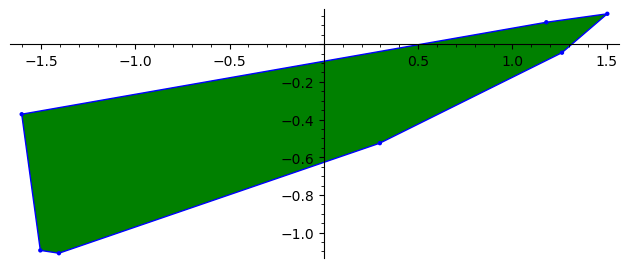

In [32]:
Polyhedron(projxy(mat_tran_p4)).plot()

# Questão 5

## a) A Imagem 14 é o resultado da Imagem 1 submetida às sete transformações seguintes.
## 1. Mudança de escala de fator 0,3 na direção x e 0,5 na direção y.
## 2. Rotação de 45° em torno do eixo x.
## 3. Translação de 1 unidade na direção x.
## 4. Rotação de 35° em torno do eixo y.
## 5. Rotação de -45° em torno do eixo z.
## 6. Translação de 1 unidade na direção z.
## 7. Mudança de escala de fator 2 na direção x. 
## Construa as matrizes M1 , M2 , . . . , M7 associadas a essas sete transformações.

## Quadrado

In [33]:
M1 = mat_esc(0.3, 0.5 ,1)
M2 = mat_rotx(-pi.n() / 4)
M3 = matrix([[1,0,0]] * 4)
M4 = mat_roty((35 * pi.n()) / 180)
M5 = mat_rotz(-pi.n()/4)
M6 = matrix([[0,0,1]] * 4)
M7 = mat_esc(2,1,1)

mat_tran_quad = ((mat_quad * M1 * M2 + M3 ) * M4 * M5 + M6) * M7
mat_tran_quad

[ 1.15845593067914 0.579227965339569  1.57357643635105]
[ 1.50599270988288 0.752996354941440  1.74564936725636]
[0.719204491707357 0.859602245853679  2.03526334992614]
[0.371667712503616 0.685833856251808  1.86319041902083]

In [34]:
Polyhedron(mat_tran_quad).plot() + coordenadas(plane = True)

Graphics3d Object

## Objeto p

In [35]:
M1 = mat_esc(0.3, 0.5 ,1)
M2 = mat_rotx(-pi.n() / 4)
M3 = matrix([[1,0,0]] * 12)
M4 = mat_roty((35 * pi.n()) / 180)
M5 = mat_rotz(-pi.n()/4)
M6 = matrix([[0,0,1]] * 12)
M7 = mat_esc(2,1,1)

mat_tran_p = ((mat_p * M1 * M2 + M3 ) * M4 * M5 + M6) * M7
mat_tran_p

[  2.13542328442330  0.667711642211649   1.51395818112053]
[  2.33093770094142 -0.100531149529289   1.92953313365194]
[  1.24483530949769   1.08841765474885  0.754237366778495]
[  1.44034972601582  0.320174863007908   1.16981231930990]
[  1.98340092173768 -0.274299539131160   1.75746020274663]
[  2.33093770094142 -0.100531149529289   1.92953313365194]
[  1.76510211248049  0.682551056240245   1.60227210524360]
[ 0.936754223104048   1.07687711155202   1.34772268834454]
[ 0.418842688064044  0.898421344032022   1.51485123021269]
[ 0.403912115625373  0.601956057812686   1.74332136736096]
[ 0.729279042400482  0.325639521200241   1.93652918897989]
[  1.40240875460871  0.217704377304353   1.98023962649535]

In [36]:
Polyhedron(mat_tran_p).plot() + coordenadas(plane = True)

/usr/lib/python3/dist-packages/sage/geometry/polyhedron/backend_cdd.py:86: UserWarning: This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.
  warn("This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.")


Graphics3d Object

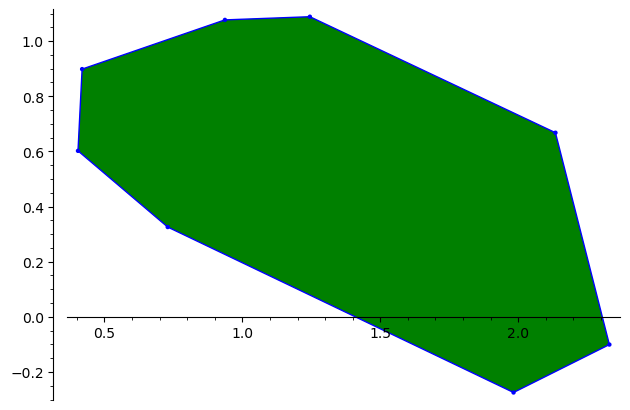

In [37]:
Polyhedron(projxy(mat_tran_p)).plot()

# 6)  Suponha que P seja a matriz de coordenadas de uma imagem que é transformada pela rotação de um ângulo $\theta$ em torno de um eixo pela origem que é especificado pelos dois ângulos $\alpha$ e $\beta$ (ver Figura Ex-6). Se P' for a matriz de coordenadas da imagem girada, encontre as matrizes de rotação R1 , R2 , R3 , R4 e R5 tais que $P' = R5 R4 R3 R2 R1 P$ [Sugestão: a rotação procurada pode ser efetuada com os cinco passos seguintes.
# 1. Rotação de um ângulo $\beta$ em torno do eixo y.
# 2. Rotação de um ângulo $\alpha$ em torno do eixo z.
# 3. Rotação de um ângulo $\theta$ em torno do eixo y.
# 4. Rotação de um ângulo $\alpha$ em torno do eixo z.
# 5. Rotação de um ângulo $-\beta$ em torno do eixo y.

In [38]:
mat_rotacao = mat_rot1(pi.n()/4,pi.n()/4,pi.n())
mat_quad * mat_rotacao

[   0.000000000000000    0.000000000000000    0.000000000000000]
[  -0.500000000000000    0.707106781186547    0.500000000000000]
[   0.207106781186548    0.707106781186548     1.20710678118655]
[   0.707106781186548 2.22044604925031e-16    0.707106781186547]

In [39]:
Polyhedron( mat_quad * mat_rotacao).plot() + coordenadas(plane = True)

Graphics3d Object

# 7) Este exercício ilustra uma técnica para transladar um ponto de coordenadas $(xi , yi , zi)$ para um ponto de coordenadas $(xi + x0, yi + y0 , zi + z0)$ por meio de multiplicação matricial em vez de adição. 

## a)  Associe o ponto $(xi , yi , zi)$ com o vetor coluna e o ponto $(xi + x0 , yi + y0 , zi + z0)$ com o vetor coluna. Encontre uma matriz M de tamanho $4X4$ tal que $vi X  Mvj$. 

In [40]:
quad_transladado = translacao(quad, [1,0,0])
quad_transladado

[1 0 0]
[2 0 0]
[2 1 0]
[1 1 0]

In [41]:
Polyhedron(quad_transladado).plot() + coordenadas(ax_size = (-2,2), plane = True)

Graphics3d Object

## b) Encontre a matriz $4X4$ específica do formato dado acima que efetua a translação do ponto $(4, -2, 3)$ para o ponto $(-1, 7, 0)$. 

In [42]:
exemplo = translacao([[4,-2,3]], [-1,7,0])
exemplo

[3 5 3]

In [43]:
Polyhedron(exemplo).plot() + coordenadas(ax_size = (-5,5), plane = True)

Graphics3d Object

# 8)

In [44]:
θ = var('θ')
sin(θ)

sin(θ)

In [45]:
matriz_identidade = (mat_rotx(θ).transpose() * mat_rotx(θ)).simplify()
matriz_identidade

[                  1                   0                   0]
[                  0 cos(θ)^2 + sin(θ)^2                   0]
[                  0                   0 cos(θ)^2 + sin(θ)^2]

In [46]:
matriz_identidade.simplify_full()

[1 0 0]
[0 1 0]
[0 0 1]

# T1

In [47]:
a,b,c = var('a,b,c')
x,y,z = var('x,y,z')
λ = var('λ')
#como o vetor é unitario a**2 + b**2 + c**2 = 1

identidade = matrix.identity(3)
n = vector([a,b,c])

n ,identidade

(
           [1 0 0]
           [0 1 0]
(a, b, c), [0 0 1]
)

## a) Mostre que $M^2 = I$ e dê uma razão física por que isso deve ser assim. [Sugestão: use que o vetor (a, b, c) é unitário para mostrar que $n^tn=1$.]

In [48]:
eq_auxiliar = solve(a**2 + b**2 + c**2 == 1, c)[1]
eq_auxiliar

c == sqrt(-a^2 - b^2 + 1)

In [49]:
M = identidade - 2*n.tensor_product(n).subs(eq_auxiliar)
M

[               -2*a^2 + 1                    -2*a*b -2*sqrt(-a^2 - b^2 + 1)*a]
[                   -2*a*b                -2*b^2 + 1 -2*sqrt(-a^2 - b^2 + 1)*b]
[-2*sqrt(-a^2 - b^2 + 1)*a -2*sqrt(-a^2 - b^2 + 1)*b         2*a^2 + 2*b^2 - 1]

In [50]:
(M.subs(eq_auxiliar)**2).simplify_full()

[1 0 0]
[0 1 0]
[0 0 1]

## b)  Use um computador para mostrar que $det(M) = -1$.

In [51]:
M.det().simplify_full()

-1

## c) Os autovetores de M satisfazem a equação

### Polinomio caracteristico

In [52]:
polinomio_car = (M.subs(eq_auxiliar) - λ * identidade).simplify_full()
polinomio_car

[           -2*a^2 - λ + 1                    -2*a*b -2*sqrt(-a^2 - b^2 + 1)*a]
[                   -2*a*b            -2*b^2 - λ + 1 -2*sqrt(-a^2 - b^2 + 1)*b]
[-2*sqrt(-a^2 - b^2 + 1)*a -2*sqrt(-a^2 - b^2 + 1)*b     2*a^2 + 2*b^2 - λ - 1]

### Autovalores associados a matriz M

In [53]:
determinante_pol = polinomio_car.det().simplify_full()
determinante_pol

-λ^3 + λ^2 + λ - 1

In [54]:
autovalores = solve(determinante_pol, λ)
autovalores

[λ == -1, λ == 1]

#### Autoespaço de $\lambda1 = -1$

In [55]:
autoespaco1 = polinomio_car.subs(λ == -1) * vector([x,y,z]).simplify_full()
autoespaco1

(-2*a*b*y - 2*sqrt(-a^2 - b^2 + 1)*a*z - 2*(a^2 - 1)*x, -2*a*b*x - 2*sqrt(-a^2 - b^2 + 1)*b*z - 2*(b^2 - 1)*y, -2*sqrt(-a^2 - b^2 + 1)*a*x - 2*sqrt(-a^2 - b^2 + 1)*b*y + 2*(a^2 + b^2)*z)

#### Verificando

Sendo V um autovetor (x,y,z) $MV = \lambda V$

In [56]:
lado_esq1 = (M * vector(autoespaco1)).simplify_full()
lado_esq1

(-2*a*b*y - 2*sqrt(-a^2 - b^2 + 1)*a*z - 2*(a^2 - 1)*x, -2*a*b*x - 2*sqrt(-a^2 - b^2 + 1)*b*z - 2*(b^2 - 1)*y, 2*(a^2 + b^2)*z - 2*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

In [57]:
lado_direito1 = ((-1) * autoespaco1).simplify_full()
lado_direito1

(2*a*b*y + 2*sqrt(-a^2 - b^2 + 1)*a*z + 2*(a^2 - 1)*x, 2*a*b*x + 2*sqrt(-a^2 - b^2 + 1)*b*z + 2*(b^2 - 1)*y, -2*(a^2 + b^2)*z + 2*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

In [58]:
(lado_esq1 - lado_direito1).simplify_full()

(-4*a*b*y - 4*sqrt(-a^2 - b^2 + 1)*a*z - 4*(a^2 - 1)*x, -4*a*b*x - 4*sqrt(-a^2 - b^2 + 1)*b*z - 4*(b^2 - 1)*y, 4*(a^2 + b^2)*z - 4*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

#### Autoespaço de $\lambda = 1$

In [59]:
autoespaco2 = polinomio_car.subs(λ == 1) * vector([x,y,z]).simplify_full()
autoespaco2

(-2*a^2*x - 2*a*b*y - 2*sqrt(-a^2 - b^2 + 1)*a*z, -2*a*b*x - 2*b^2*y - 2*sqrt(-a^2 - b^2 + 1)*b*z, -2*sqrt(-a^2 - b^2 + 1)*a*x - 2*sqrt(-a^2 - b^2 + 1)*b*y + 2*(a^2 + b^2 - 1)*z)

#### Verificando

Sendo V um autovetor (x,y,z) $MV = \lambda V$

In [60]:
lado_esq2 = (M * vector(autoespaco2)).simplify_full()
lado_esq2

(2*a^2*x + 2*a*b*y + 2*sqrt(-a^2 - b^2 + 1)*a*z, 2*a*b*x + 2*b^2*y + 2*sqrt(-a^2 - b^2 + 1)*b*z, -2*(a^2 + b^2 - 1)*z + 2*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

In [61]:
lado_direito2 = (autoespaco2).simplify_full()
lado_direito2

(-2*a^2*x - 2*a*b*y - 2*sqrt(-a^2 - b^2 + 1)*a*z, -2*a*b*x - 2*b^2*y - 2*sqrt(-a^2 - b^2 + 1)*b*z, 2*(a^2 + b^2 - 1)*z - 2*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

In [62]:
(lado_esq2 - lado_direito2).simplify_full()

(4*a^2*x + 4*a*b*y + 4*sqrt(-a^2 - b^2 + 1)*a*z, 4*a*b*x + 4*b^2*y + 4*sqrt(-a^2 - b^2 + 1)*b*z, -4*(a^2 + b^2 - 1)*z + 4*sqrt(-a^2 - b^2 + 1)*(a*x + b*y))

# T2

In [63]:
a,b,c = var('a,b,c') # o vetor (a,b,c) deve ser unitario
θ, ϕ = var('θ,ϕ')
R = var('R')

relacao_teste = (a == 1/sqrt(3).n(), b == 1/sqrt(3).n(), c == 1/sqrt(3).n(), θ == pi.n()/2, ϕ == pi.n()/2)
relacao_unitaria = (c == sqrt(1 - a**2 - b**2))
n = vector([a,b,c])
vetor_uni = vector([a,b,c]) # o vetor (a,b,c) deve ser unitario

R = cos(θ) * matrix([[1,0,0],[0,1,0],[0,0,1]]) + (1 - cos(θ)) * n.tensor_product(n) + sin(θ) * matrix([[0,-c,b],[c,0,-a],[-b,a,0]])
#mat_rot2(θ, vetor_uni)
#R.subs(c == sqrt(a**2 + b**2 - 1))

## $R(\theta)$

In [64]:
matriz_theta = mat_rot2(θ, vetor_uni).subs(relacao_unitaria).simplify_full()
matriz_theta

[                         a^2 - (a^2 - 1)*cos(θ) -a*b*cos(θ) + a*b - sqrt(-a^2 - b^2 + 1)*sin(θ)  b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a)]
[-a*b*cos(θ) + a*b + sqrt(-a^2 - b^2 + 1)*sin(θ)                          b^2 - (b^2 - 1)*cos(θ) -a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)]
[-b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a)  a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)             -a^2 - b^2 + (a^2 + b^2)*cos(θ) + 1]

## $R(\phi)$

In [65]:
matriz_phi = mat_rot2(ϕ, vetor_uni).subs(relacao_unitaria).simplify_full()
matriz_phi

[                         a^2 - (a^2 - 1)*cos(ϕ) -a*b*cos(ϕ) + a*b - sqrt(-a^2 - b^2 + 1)*sin(ϕ)  b*sin(ϕ) - sqrt(-a^2 - b^2 + 1)*(a*cos(ϕ) - a)]
[-a*b*cos(ϕ) + a*b + sqrt(-a^2 - b^2 + 1)*sin(ϕ)                          b^2 - (b^2 - 1)*cos(ϕ) -a*sin(ϕ) - sqrt(-a^2 - b^2 + 1)*(b*cos(ϕ) - b)]
[-b*sin(ϕ) - sqrt(-a^2 - b^2 + 1)*(a*cos(ϕ) - a)  a*sin(ϕ) - sqrt(-a^2 - b^2 + 1)*(b*cos(ϕ) - b)             -a^2 - b^2 + (a^2 + b^2)*cos(ϕ) + 1]

### $R(\theta)R(\phi)$

In [66]:
matriz_thetaphi1 = (matriz_theta * matriz_phi).subs(relacao_unitaria).simplify_full()
matriz_thetaphi1

[                                           -(a^2 - 1)*cos(θ)*cos(ϕ) + (a^2 - 1)*sin(θ)*sin(ϕ) + a^2 -a*b*cos(θ)*cos(ϕ) + a*b*sin(θ)*sin(ϕ) + a*b - sqrt(-a^2 - b^2 + 1)*(cos(ϕ)*sin(θ) + cos(θ)*sin(ϕ))    b*cos(ϕ)*sin(θ) + b*cos(θ)*sin(ϕ) - (a*cos(θ)*cos(ϕ) - a*sin(θ)*sin(ϕ) - a)*sqrt(-a^2 - b^2 + 1)]
[-a*b*cos(θ)*cos(ϕ) + a*b*sin(θ)*sin(ϕ) + a*b + sqrt(-a^2 - b^2 + 1)*(cos(ϕ)*sin(θ) + cos(θ)*sin(ϕ))                                            -(b^2 - 1)*cos(θ)*cos(ϕ) + (b^2 - 1)*sin(θ)*sin(ϕ) + b^2   -a*cos(ϕ)*sin(θ) - a*cos(θ)*sin(ϕ) - (b*cos(θ)*cos(ϕ) - b*sin(θ)*sin(ϕ) - b)*sqrt(-a^2 - b^2 + 1)]
[  -b*cos(ϕ)*sin(θ) - b*cos(θ)*sin(ϕ) - (a*cos(θ)*cos(ϕ) - a*sin(θ)*sin(ϕ) - a)*sqrt(-a^2 - b^2 + 1)    a*cos(ϕ)*sin(θ) + a*cos(θ)*sin(ϕ) - (b*cos(θ)*cos(ϕ) - b*sin(θ)*sin(ϕ) - b)*sqrt(-a^2 - b^2 + 1)                               (a^2 + b^2)*cos(θ)*cos(ϕ) - (a^2 + b^2)*sin(θ)*sin(ϕ) - a^2 - b^2 + 1]

### $R(\theta + \phi)$

In [67]:
matriz_thetaphi2 = mat_rot2( θ + ϕ, vetor_uni).subs(relacao_unitaria).simplify_full()
matriz_thetaphi2

[                                           -(a^2 - 1)*cos(θ)*cos(ϕ) + (a^2 - 1)*sin(θ)*sin(ϕ) + a^2 -a*b*cos(θ)*cos(ϕ) + a*b*sin(θ)*sin(ϕ) + a*b - sqrt(-a^2 - b^2 + 1)*(cos(ϕ)*sin(θ) + cos(θ)*sin(ϕ))    b*cos(ϕ)*sin(θ) + b*cos(θ)*sin(ϕ) - (a*cos(θ)*cos(ϕ) - a*sin(θ)*sin(ϕ) - a)*sqrt(-a^2 - b^2 + 1)]
[-a*b*cos(θ)*cos(ϕ) + a*b*sin(θ)*sin(ϕ) + a*b + sqrt(-a^2 - b^2 + 1)*(cos(ϕ)*sin(θ) + cos(θ)*sin(ϕ))                                            -(b^2 - 1)*cos(θ)*cos(ϕ) + (b^2 - 1)*sin(θ)*sin(ϕ) + b^2   -a*cos(ϕ)*sin(θ) - a*cos(θ)*sin(ϕ) - (b*cos(θ)*cos(ϕ) - b*sin(θ)*sin(ϕ) - b)*sqrt(-a^2 - b^2 + 1)]
[  -b*cos(ϕ)*sin(θ) - b*cos(θ)*sin(ϕ) - (a*cos(θ)*cos(ϕ) - a*sin(θ)*sin(ϕ) - a)*sqrt(-a^2 - b^2 + 1)    a*cos(ϕ)*sin(θ) + a*cos(θ)*sin(ϕ) - (b*cos(θ)*cos(ϕ) - b*sin(θ)*sin(ϕ) - b)*sqrt(-a^2 - b^2 + 1)                               (a^2 + b^2)*cos(θ)*cos(ϕ) - (a^2 + b^2)*sin(θ)*sin(ϕ) - a^2 - b^2 + 1]

## $R(\theta)R(\phi) - R(\theta + \phi)$

In [68]:
matriz_thetaphi1 - matriz_thetaphi2

[0 0 0]
[0 0 0]
[0 0 0]

## Teste pratico, rotações sucessivas

In [69]:
ch1 = pi.n()/2 # angulo de rotação
ch2 = pi.n()/2 # angulo de rotação
eixo = vector([1/sqrt(3).n(),1/sqrt(3).n(),1/sqrt(3).n()]) # o vetor (a,b,c) deve ser unitario, eixo de rotação

Matrix de rotação (primeira figura)

In [70]:
mat_rot2(ch1,eixo) * mat_rot2(ch2,eixo)

[-0.333333333333333  0.666666666666667  0.666666666666667]
[ 0.666666666666667 -0.333333333333333  0.666666666666667]
[ 0.666666666666667  0.666666666666667 -0.333333333333333]

In [71]:
Polyhedron(mat_quad * mat_rot2(ch1,eixo) * mat_rot2(ch2,eixo)).plot() +coordenadas(plane = True)

Graphics3d Object

Matrix de rotação (segunda figura)

In [72]:
mat_rot2( ch1 + ch2 , eixo )

[-0.333333333333333  0.666666666666667  0.666666666666667]
[ 0.666666666666667 -0.333333333333333  0.666666666666667]
[ 0.666666666666667  0.666666666666667 -0.333333333333333]

In [73]:
Polyhedron(mat_quad * mat_rot2( ch1 + ch2 , eixo ) ).plot() + coordenadas(plane = True)

Graphics3d Object

Como pudemos ver duas rotações sucessivas $\theta$ e $\phi$ equivalem a uma unica rotação $\theta + \phi$

## b) Mostre também que $R^{-1} (\theta) = R(-\theta)$ e dê uma razão física para isso.

In [74]:
matriz_thetainversa = mat_rot2(θ, vetor_uni).subs(relacao_unitaria).inverse().simplify_full()
matriz_thetainversa

[                         a^2 - (a^2 - 1)*cos(θ) -a*b*cos(θ) + a*b + sqrt(-a^2 - b^2 + 1)*sin(θ) -b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a)]
[-a*b*cos(θ) + a*b - sqrt(-a^2 - b^2 + 1)*sin(θ)                          b^2 - (b^2 - 1)*cos(θ)  a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)]
[ b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a) -a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)             -a^2 - b^2 + (a^2 + b^2)*cos(θ) + 1]

In [75]:
matriz_menostheta = mat_rot2(-θ, vetor_uni).subs(relacao_unitaria).simplify_full()
matriz_menostheta

[                         a^2 - (a^2 - 1)*cos(θ) -a*b*cos(θ) + a*b + sqrt(-a^2 - b^2 + 1)*sin(θ) -b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a)]
[-a*b*cos(θ) + a*b - sqrt(-a^2 - b^2 + 1)*sin(θ)                          b^2 - (b^2 - 1)*cos(θ)  a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)]
[ b*sin(θ) - sqrt(-a^2 - b^2 + 1)*(a*cos(θ) - a) -a*sin(θ) - sqrt(-a^2 - b^2 + 1)*(b*cos(θ) - b)             -a^2 - b^2 + (a^2 + b^2)*cos(θ) + 1]

In [76]:
matriz_thetainversa - matriz_menostheta

[0 0 0]
[0 0 0]
[0 0 0]

## c) Use um computador para mostrar que $det(R(\theta)) = 1$

In [77]:
mat_rot2(θ, vetor_uni).subs(relacao_unitaria).det().simplify_full()

1